# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Maulidani brian melvino
- **Email:** melmel67799@gmail.com
- **ID Dicoding:** MS101D5Y0505

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh suhu terhadap jumlah peminjaman sepeda?
- Bagaimana tren peminjaman sepeda berdasarkan hari kerja dan libur?

## Import Semua Packages/Library yang Digunakan

In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 635.4 kB/s eta 0:00:18
   -- ------------------------------------- 0.8/11.5 MB 737.1 kB/s eta 0:00:15
   -- ------------------------------------- 0.8/11.5 MB 737.1 kB/s eta 0:00:15
   --- ------------------------------------ 1.0/11.5 MB 749.3 kB/s eta 0:00:14
   --- ------------------------------------ 1.0/11.5 MB 749.3 kB/s eta 0:00:14
   ---- ----------------------------------- 1.3/11.5 MB 698.5 kB/s eta 0:00:15
   ---- ----------------------------------- 1.3/11.5 MB 698.5 kB/s eta 0:00:15
   ---- ----------------------------------- 1.3/11.5 MB 698.5 kB/s eta 0:00:15
   ----- ---------

## Data Wrangling

### Gathering Data

In [2]:
import pandas as pd

df_day = pd.read_csv('./data/day.csv')
df_hour = pd.read_csv('./data/hour.csv')

print(df_day.shape)
display(df_day.head())
print(df_hour.shape)
display(df_hour.head())

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv memiliki 731 baris, yang berarti mencakup data penyewaan sepeda selama 731 hari (2 tahun: 2011-2012).

- Dataset hour.csv memiliki 17,379 baris, yang berarti mencakup data penyewaan setiap jam selama 2 tahun.

### Assessing Data

In [3]:
df_day.info()
df_hour.info()

# df_day.duplicated().sum()
# df_hour.duplicated().sum()

print(df_day.isnull().sum())
print(df_hour.isnull().sum())

# df_day.describe()
# df_hour.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Tidak ada missing values
- Tipe data lainnya sudah sesuai
- Format tanggal (dteday) masih berupa object (string)
- Kolom "instant" tampaknya hanya ID

### Cleaning Data

In [4]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

df_day.drop(columns=['instant'], inplace=True)
df_hour.drop(columns=['instant'], inplace=True)

df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB
<class '

**Insight:**
- Kolom dteday berhasil dikonversi ke format datetime
- Kolom instant telah dihapus karena tidak diperlukan
- Tidak ada missing values setelah pembersihan

## Exploratory Data Analysis (EDA)

### Explore ...

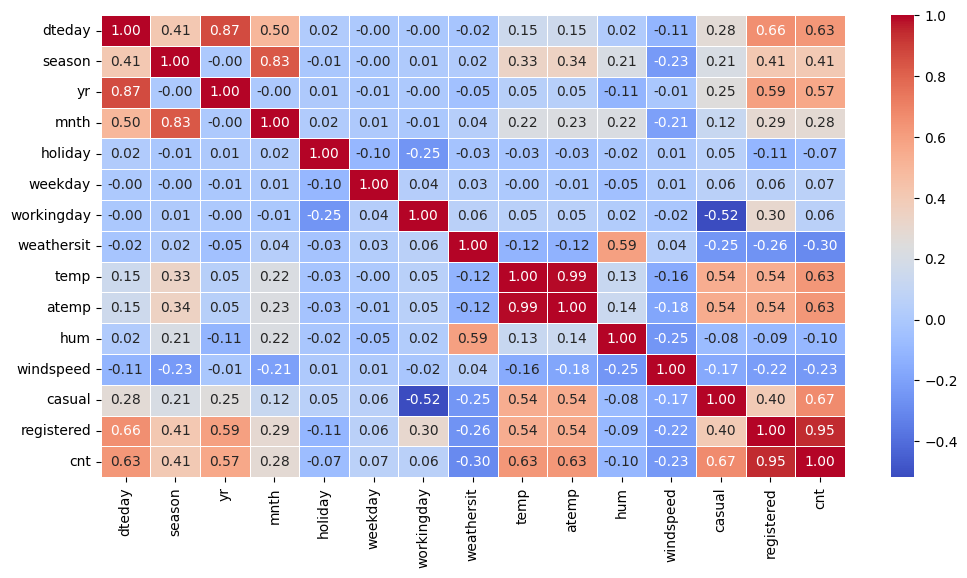

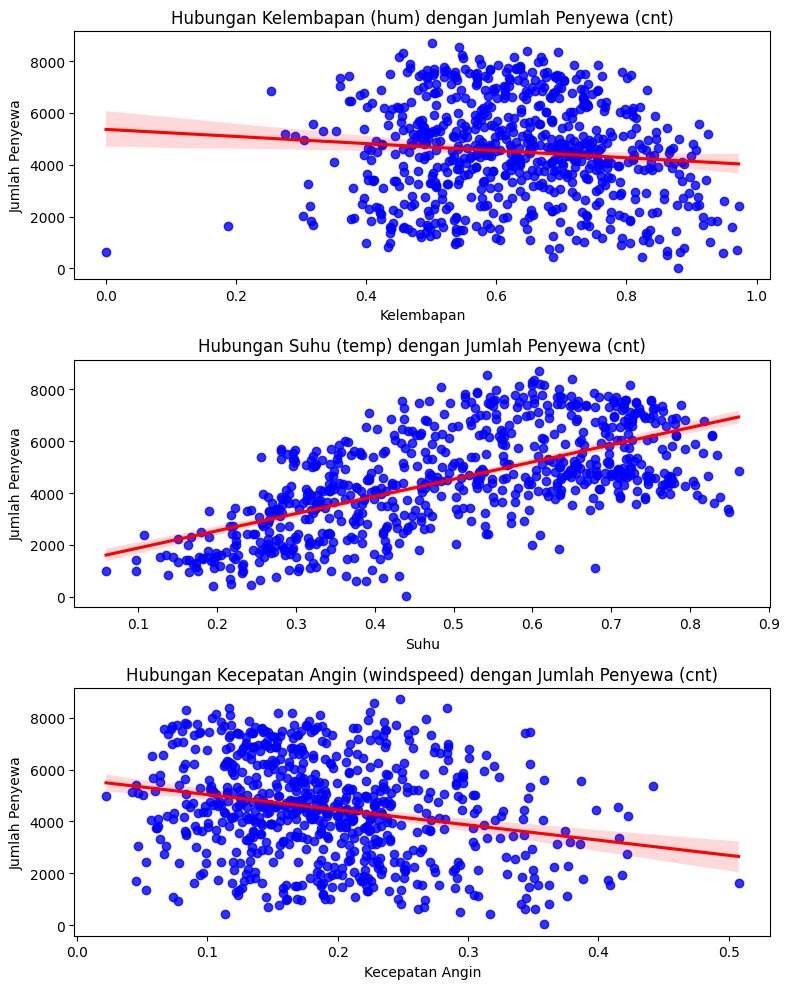

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corelation_matrix = df_day.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

#analisis hubungan
plt.figure(figsize=(8, 10))

# Subplot 1: Hubungan Kelembapan (hum) dengan Jumlah Penyewa (cnt)
plt.subplot(3, 1, 1)
sns.regplot(x=df_day['hum'], y=df_day['cnt'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Hubungan Kelembapan (hum) dengan Jumlah Penyewa (cnt)")
plt.xlabel("Kelembapan")
plt.ylabel("Jumlah Penyewa")

# Subplot 2: Hubungan Suhu (temp) dengan Jumlah Penyewa (cnt)
plt.subplot(3, 1, 2)
sns.regplot(x=df_day['temp'], y=df_day['cnt'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Hubungan Suhu (temp) dengan Jumlah Penyewa (cnt)")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewa")

# Subplot 3: Hubungan Kecepatan Angin (windspeed) dengan Jumlah Penyewa (cnt)
plt.subplot(3, 1, 3)
sns.regplot(x=df_day['windspeed'], y=df_day['cnt'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Hubungan Kecepatan Angin (windspeed) dengan Jumlah Penyewa (cnt)")
plt.xlabel("Kecepatan Angin")
plt.ylabel("Jumlah Penyewa")

plt.tight_layout()
plt.show()



**Insight:**
- Faktor paling berpengaruh : Suhu (temp)  memiliki pengaruh terbesar terhadap jumlah penyewaan sepeda, diikuti oleh kecepatan angin (windspeed) .
- Hubungan spesifik :
    - Suhu (temp) : Korelasi positif kuat.
    - Kelembapan (hum) : Tidak ada korelasi signifikan.
    - Kecepatan Angin (windspeed) : Korelasi negatif kuat.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

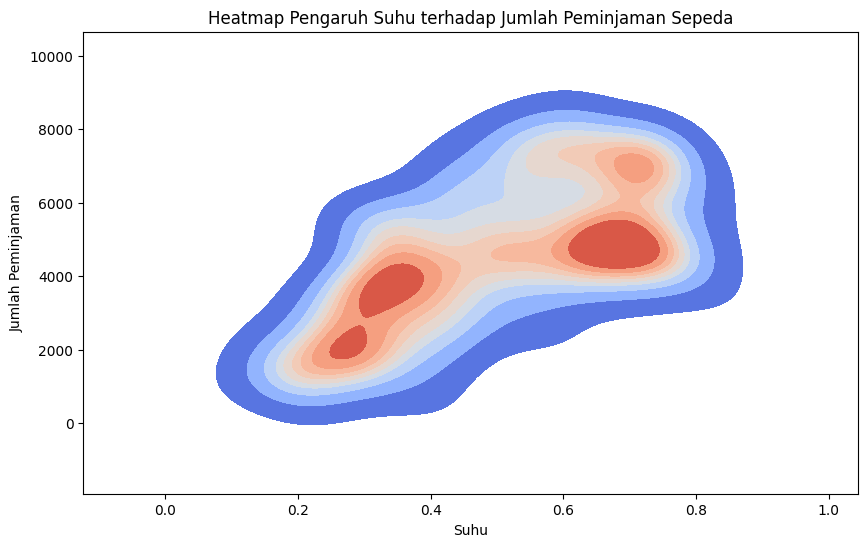

In [6]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df_day["temp"], y=df_day["cnt"], cmap="coolwarm", fill=True)
plt.title("Heatmap Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Peminjaman")
plt.show()

### Pertanyaan 2:

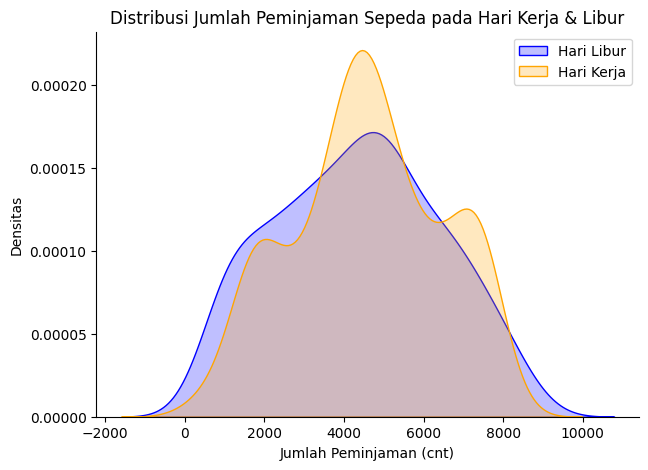

In [7]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

hari_libur = df_day[df_day['workingday'] == 0]['cnt']  # Hari libur/akhir pekan
hari_kerja = df_day[df_day['workingday'] == 1]['cnt']  # Hari kerja

sns.kdeplot(hari_libur, fill=True, label="Hari Libur", color="blue")
sns.kdeplot(hari_kerja, fill=True, label="Hari Kerja", color="orange")
plt.xlabel("Jumlah Peminjaman (cnt)")
plt.ylabel("Densitas")
plt.title("Distribusi Jumlah Peminjaman Sepeda pada Hari Kerja & Libur")
plt.legend()

plt.show()

**Insight:**
- Rata-rata peminjaman lebih tinggi pada hari kerja dibanding hari libur.
- Peminjaman sepeda cenderung meningkat pada suhu sedang, tetapi menurun saat suhu terlalu tinggi.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

> - Suhu mempengaruhi jumlah peminjaman sepeda, dengan tren peningkatan pada suhu sedang dan penurunan pada suhu yang terlalu tinggi.

> - Hal ini bisa dikarenakan cuaca yang terlalu panas atau terlalu dingin membuat orang enggan bersepeda.


- Conclution pertanyaan 2

> - Rata-rata peminjaman sepeda lebih tinggi pada hari kerja dibandingkan hari libur.

> - Hal ini menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi ke tempat kerja/sekolah dibanding untuk rekreasi.
